In [1]:
import rebound
import numpy as np

In [2]:
sim=rebound.Simulation()

Let $r_1$ and $r_2$ be the respective distances of the two bodies from the barycenter, which we place at the origin.
Thus, the specific total energy, $E$, at any given time is given by $$\epsilon = \frac{1}{2}(v_1-v_2)^2 - \frac{G(m_1+m_2)}{r_1+r_2}$$

This is constant throughout the orbits, so considering periapsis and apoapsis, we can write $$\frac{(v_{1p}-v_{2p})^2}{2}-\frac{G(m_1+m_2)}{r_{1p}+r_{2p}} = \frac{(v_{1a}-v_{2a})^2}{2}-\frac{G(m_1+m_2)}{r_{1a}+r_{2a}}$$ $$\frac{(v_{1p}-v_{2p})^2}{2}-\frac{(v_{1a}-v_{2a})^2}{2} = \frac{G(m_1+m_2)}{r_{1p}+r_{2p}}-\frac{G(m_1+m_2)}{r_{1a}+r_{2a}}$$

Note that $\vec{r_1}$ is antiparallel to $\vec{r_2}$. Therefore $r_{1p}+r_{2p}$ = $r_p$ and $r_{1a}+r_{2a}$ = $r_a$, where $r_a$ and $r_p$ are the mutual separations at periapsis and apoapsis. We can also say that $r_p$ = $a(1-e)$ and $r_a$ = $a(1+e)$, where $a$ and $e$ are the mutual semimajor axis and eccentricity. We define $a = a_1 + a_2$, where $a_1$ is the semimajor axis of particle 1 about the barycenter. $$ '' = G(m_1+m_2)\left[\frac{1}{a(1-e)} - \frac{1}{a(1+e)}\right]$$ $$ '' = G(m_1+m_2)\left[\frac{2e}{a(1-e^2)}\right]$$

On the left side, we can combine terms by noting that, due to conservation of angular momentum, $$v_{1p}r_{1p}=v_{1a}r_{2a}$$ $$v_{1a}=\frac{r_{1p}}{r_{1a}}v_{1p}$$ This means that $$(v_{1a}-v_{2a})^2 = \left(\frac{r_{1p}}{r_{1a}}v_{1p}-\frac{r_{2p}}{r_{2a}}v_{2p}\right)^2$$ Since we are in barycentric coordinates, with the barycenter at (0,0), $$m_1r_1=m_2r_2$$ $$r_{2p}=\frac{m_1}{m_2}r_{1p}$$ $$r_{2a}=\frac{m_1}{m_2}r_{1a}$$ $$\frac{r_{2p}}{r_{2a}}=\frac{r_{1p}}{r_{1a}}$$ Therefore, $$(v_{1a}-v_{2a})^2 = \left(\frac{r_{1p}}{r_{1a}}\right)^2(v_{1p}-v_{2p})^2$$

The original equation is thus rewritten as $$\frac{1}{2}\left[(v_{1p}-v_{2p})^2\left(1-\left(\frac{r_{1p}}{r_{1a}}\right)^2\right)\right] = G(m_1+m_2)\left[\frac{2e}{a(1-e^2)}\right]$$

We note that $$\frac{(r_{1a}+r_{1p})(r_{1a}-r_{1p})}{r_{1a}^2}=\frac{2a_1 \times 2a_1e}{r_{1a}^2}=\frac{4a_1^2e}{r_{1a}^2}$$

$$\frac{4a_1^2e}{r_{1a}^2}(v_{1p}-v_{2p})^2 = G(m_1+m_2)\left[\frac{4e}{a(1-e^2)}\right]$$

$$\frac{a_1^2}{r_{1a}^2}(v_{1p}-v_{2p})^2 = G(m_1+m_2)\left[\frac{1}{a(1-e^2)}\right]$$

We note further that $$r_{1a} = a_1(1+e)$$ 

$$\frac{1}{(1+e)^2}(v_{1p}-v_{2p})^2 = G(m_1+m_2)\left[\frac{1}{a(1-e^2)}\right]$$

 $$v_{1p}-v_{2p} = \sqrt{\frac{G(m_1+m_2)}{a}\frac{(1+e)}{(1-e)}}$$

This is not terribly helpful, as it only gives us the relative velocity $v=v_1-v_2$. We want $v_{1p}$ all on its own.

If we consider that $m_1r_1=m_2r_2$, then it must also be true that $|\frac{\partial}{\partial{t}}(m_1r_1)|=|\frac{\partial}{\partial{t}}(m_2r_2)|$. Thus,

 $$v_{2p} = -\frac{m_1}{m_2}v_{1p}$$

$$v_{1p}=\frac{m_2}{m_1+m_2}\sqrt{\frac{G(m_1+m_2)}{a}\frac{(1+e)}{(1-e)}}$$

$$v_{2p}=-\frac{m_1}{m_1+m_2}\sqrt{\frac{G(m_1+m_2)}{a}\frac{(1+e)}{(1-e)}}$$

We'll define initial conditions such that particle 1 (Star A) is on the right side of the origin, and particle 2 (Star B) is on the left side of the origin, and that the system orbits counter-clockwise.

In [3]:
m1 = 1.0
m2 = 1.0
aa = 2.0
ee = 0.0
r1p = m2/(m1+m2)*aa*(1-ee)
r2p = -m1/(m1+m2)*aa*(1-ee)
v1p = m2/(m1+m2)*np.sqrt((m1+m2)/aa*(1+ee)/(1-ee))
v2p = -m1/(m1+m2)*np.sqrt((m1+m2)/aa*(1+ee)/(1-ee))
print v1p,v2p

0.5 -0.5


In [4]:
sim.add(m=m1,x=r1p,vx=0,vy=v1p)
sim.add(m=m2,x=r2p,vx=0,vy=v2p)

In [5]:
sim.move_to_com()

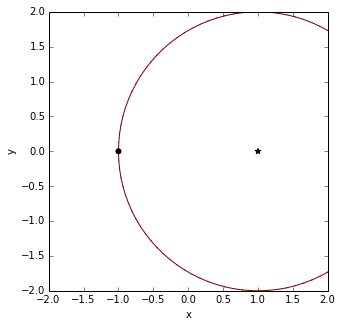

In [6]:
%matplotlib inline
fig=rebound.OrbitPlot(sim,color=True)

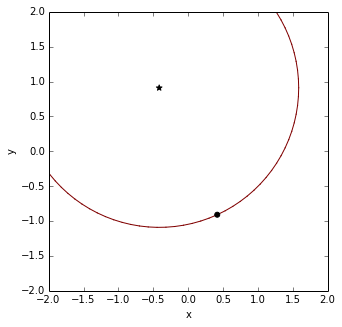

In [7]:
sim.integrate(4.0)
fig=rebound.OrbitPlot(sim,color=True)

In [8]:
years = 5.0
tmax = years*2*np.pi
times= np.linspace(0,tmax,num=200)
sa = np.zeros([2,len(times)])
sb = np.zeros([2,len(times)])
i=0
while i<len(times):
    sim.integrate(times[i])
    sim.move_to_com()
    sa[0][i]=sim.particles[0].x
    sa[1][i]=sim.particles[0].y
    sb[0][i]=sim.particles[1].x
    sb[1][i]=sim.particles[1].y
    i+=1

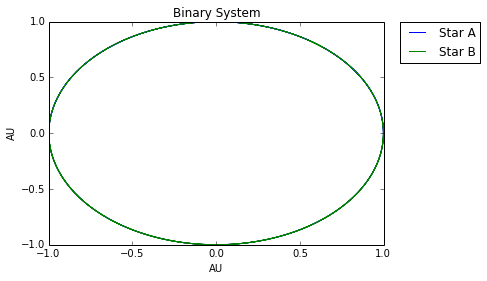

In [9]:
from pylab import *
sao = plot(sa[0],sa[1],label='Star A')
sbo = plot(sb[0],sb[1],label='Star B')
ylabel('AU')
xlabel('AU')
title('Binary System')
l=legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)